In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [2]:
housing_data=pd.read_csv('Housing.csv')
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
hd_data=pd.read_csv('hd.csv')
hd_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,True,True,True,True,2,True,1
1,12250000,8960,4,4,4,True,True,True,True,True,3,True,1
2,12250000,9960,3,2,2,True,True,True,True,True,2,True,2
3,12215000,7500,4,2,2,True,True,True,True,True,3,True,1
4,11410000,7420,4,1,2,True,True,True,True,True,2,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,True,True,True,True,2,True,0
541,1767150,2400,3,1,1,True,True,True,True,True,0,True,2
542,1750000,3620,2,1,1,True,True,True,True,True,0,True,0
543,1750000,2910,3,1,1,True,True,True,True,True,0,True,1


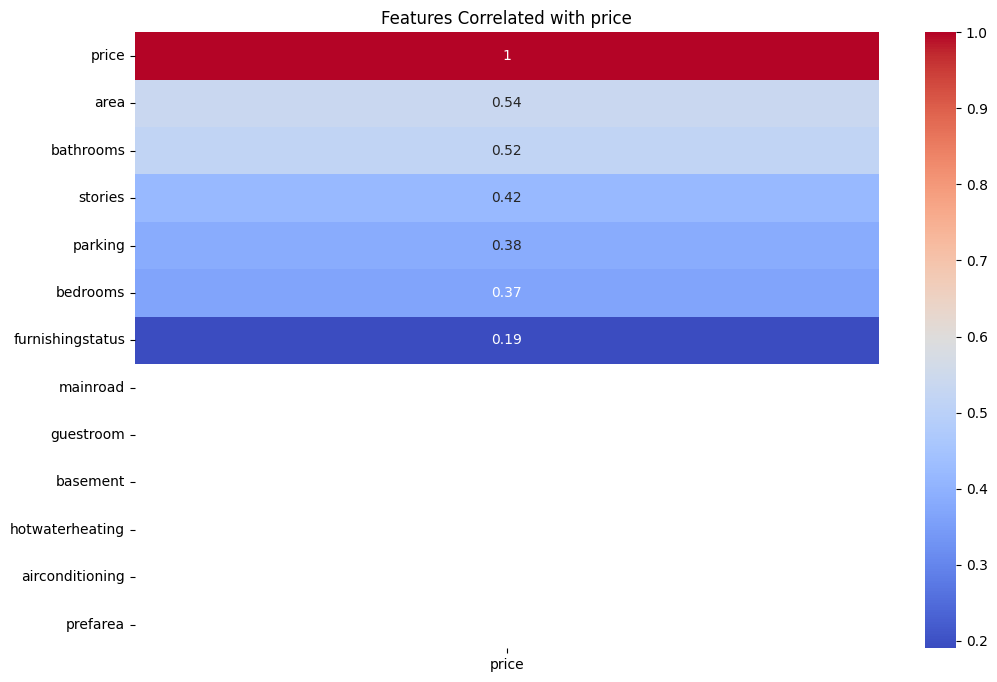

In [4]:
corr = hd_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Features Correlated with price")
plt.show()

In [4]:

# Example dataset (replace with your housing data)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)

# Model
model = RandomForestRegressor()

# 5-Fold Cross Validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive RMSE
rmse_scores = (-scores)**0.5
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-validated RMSE scores: [ 95.93326797  56.34951807 108.58535443  69.84331894  71.17750731]
Average RMSE: 80.37779334433672


In [6]:
X = hd_data.drop('price', axis=1)
y = hd_data['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the model
rf = RandomForestRegressor(
    n_estimators=100,   # Number of trees
    max_depth=None,     # Let trees grow fully
    random_state=42
)

# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Predict on test data
y_pred = rf.predict(X_test)



# y_test = actual prices
# y_pred = predicted prices
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
import numpy as np

mpae = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Percentage Absolute Error (MPAE):", mpae)



Mean Absolute Error (MAE): 1125108.3484199797
Mean Percentage Absolute Error (MPAE): 24.440713069365987


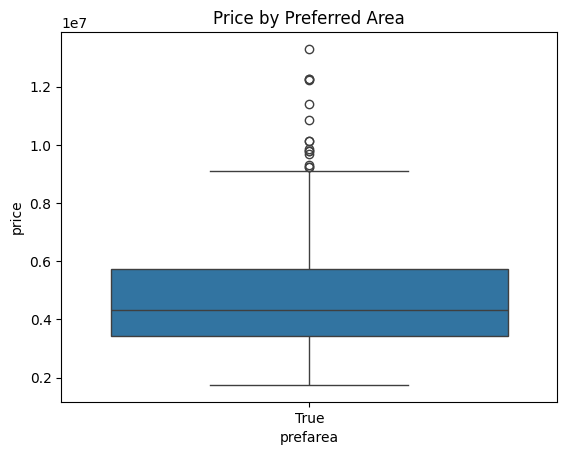

In [19]:
# Preferred Area vs. Price
sns.boxplot(x='prefarea', y='price', data=hd_data)
plt.title('Price by Preferred Area')
plt.show()

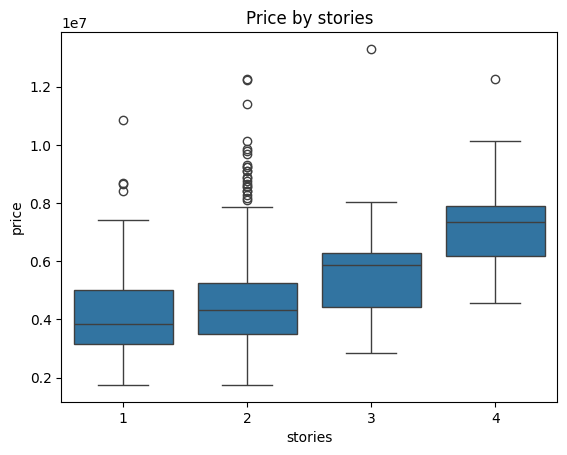

In [31]:
# stories vs. Price
sns.boxplot(x='stories', y='price', data=hd_data)
plt.title('Price by stories')
plt.show()

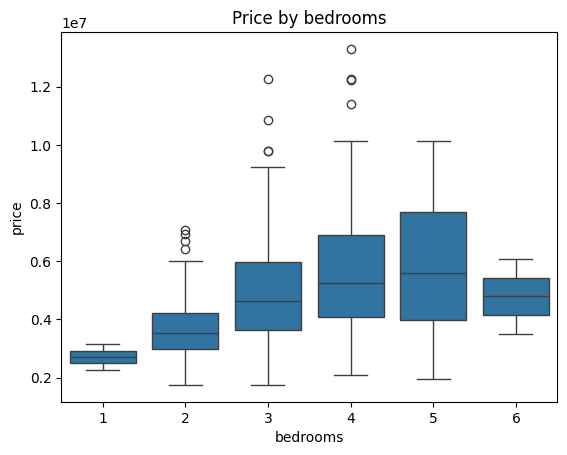

In [21]:
# stories vs. Price
sns.boxplot(x='bedrooms', y='price', data=hd_data)
plt.title('Price by bedrooms')
plt.show()

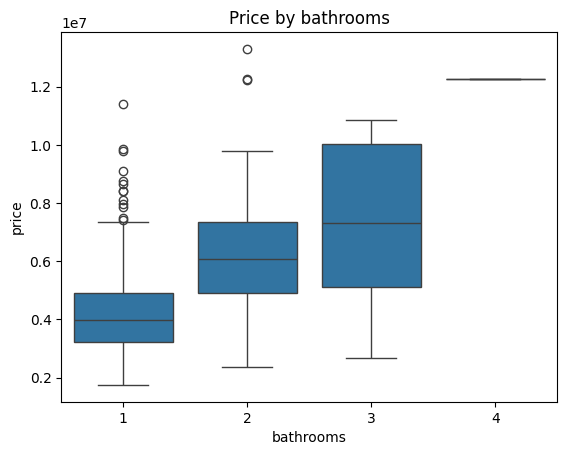

In [22]:
# bathrooms vs. Price
sns.boxplot(x='bathrooms', y='price', data=hd_data)
plt.title('Price by bathrooms')
plt.show()